In [1]:
import pandas as pd
import sys
sys.path.insert(0, "/home/apprenant/simplon_projects/house_price/")
from src.d00_utils.functions import columns_with_missing_values
import seaborn as sns
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

Importez la donnée

In [2]:
df = pd.read_csv(r"/home/apprenant/simplon_projects/house_price/data/train.csv")

In [3]:
df.shape

(1460, 81)

Affichez les 10 premières lignes du jeux de données

In [4]:
df.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
5         Lvl    AllPub  ...        0    NaN  MnPrv        Shed     700   
6         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
7         Lvl    AllPub  ...        0    NaN    NaN        Shed     350   
8         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
9         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  
5     10   2009        WD         Normal     143000  
6      8   2007        WD         Normal     307000  
7     11   2009        WD         Normal     200000  
8      4   2008        WD        Abnorml     129900  
9      1   2008        WD         Normal     118000  

[10 rows x 81 columns]

Utilisez le .info()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Supprimez de façon automatique les variables avec plus de 30% de valeurs manquantes

In [6]:
columns_with_missing_values(df, 0.3)

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [7]:
df = df.drop(columns_with_missing_values(df, 0.3), axis = 1)

Affichez avec un describe les informations de SalePrice

In [8]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Affichez la distribution de SalePrice avec un distplot. Conclure sur la graphique: Que pouvez vous dire?

/home/apprenant/anaconda3/envs/env/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

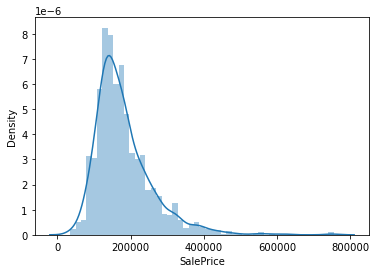

In [9]:
sns.distplot(df.SalePrice)

La distribution ressemble à une distribution normale asymétrique qui aurait un coefficient d'asymérie positif (Positive skew) avec une queue de distribution étalée vers la droite.

### Focus variables quantitatives:

Sélectionnez les variables int64 + float64 afin d'afficher les histogrammes pour l'ensemble de ces variables. Qu'elles sont les variables ayant une distribution proche de SalePrice? Que peut on conclure de ces variables?


In [10]:
numeric_cols = df.select_dtypes(include=[ 'int64','float64' ])

array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'OverallCond'}>],
       [<AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'YearRemodAdd'}>,
        <AxesSubplot:title={'center':'MasVnrArea'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>,
        <AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>],
       [<AxesSubplot:title={'center':'TotalBsmtSF'}>,
        <AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'LowQualFinSF'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'BsmtFullBath'}>],
       [<AxesSubplot:title={'center':'BsmtHalfBath'

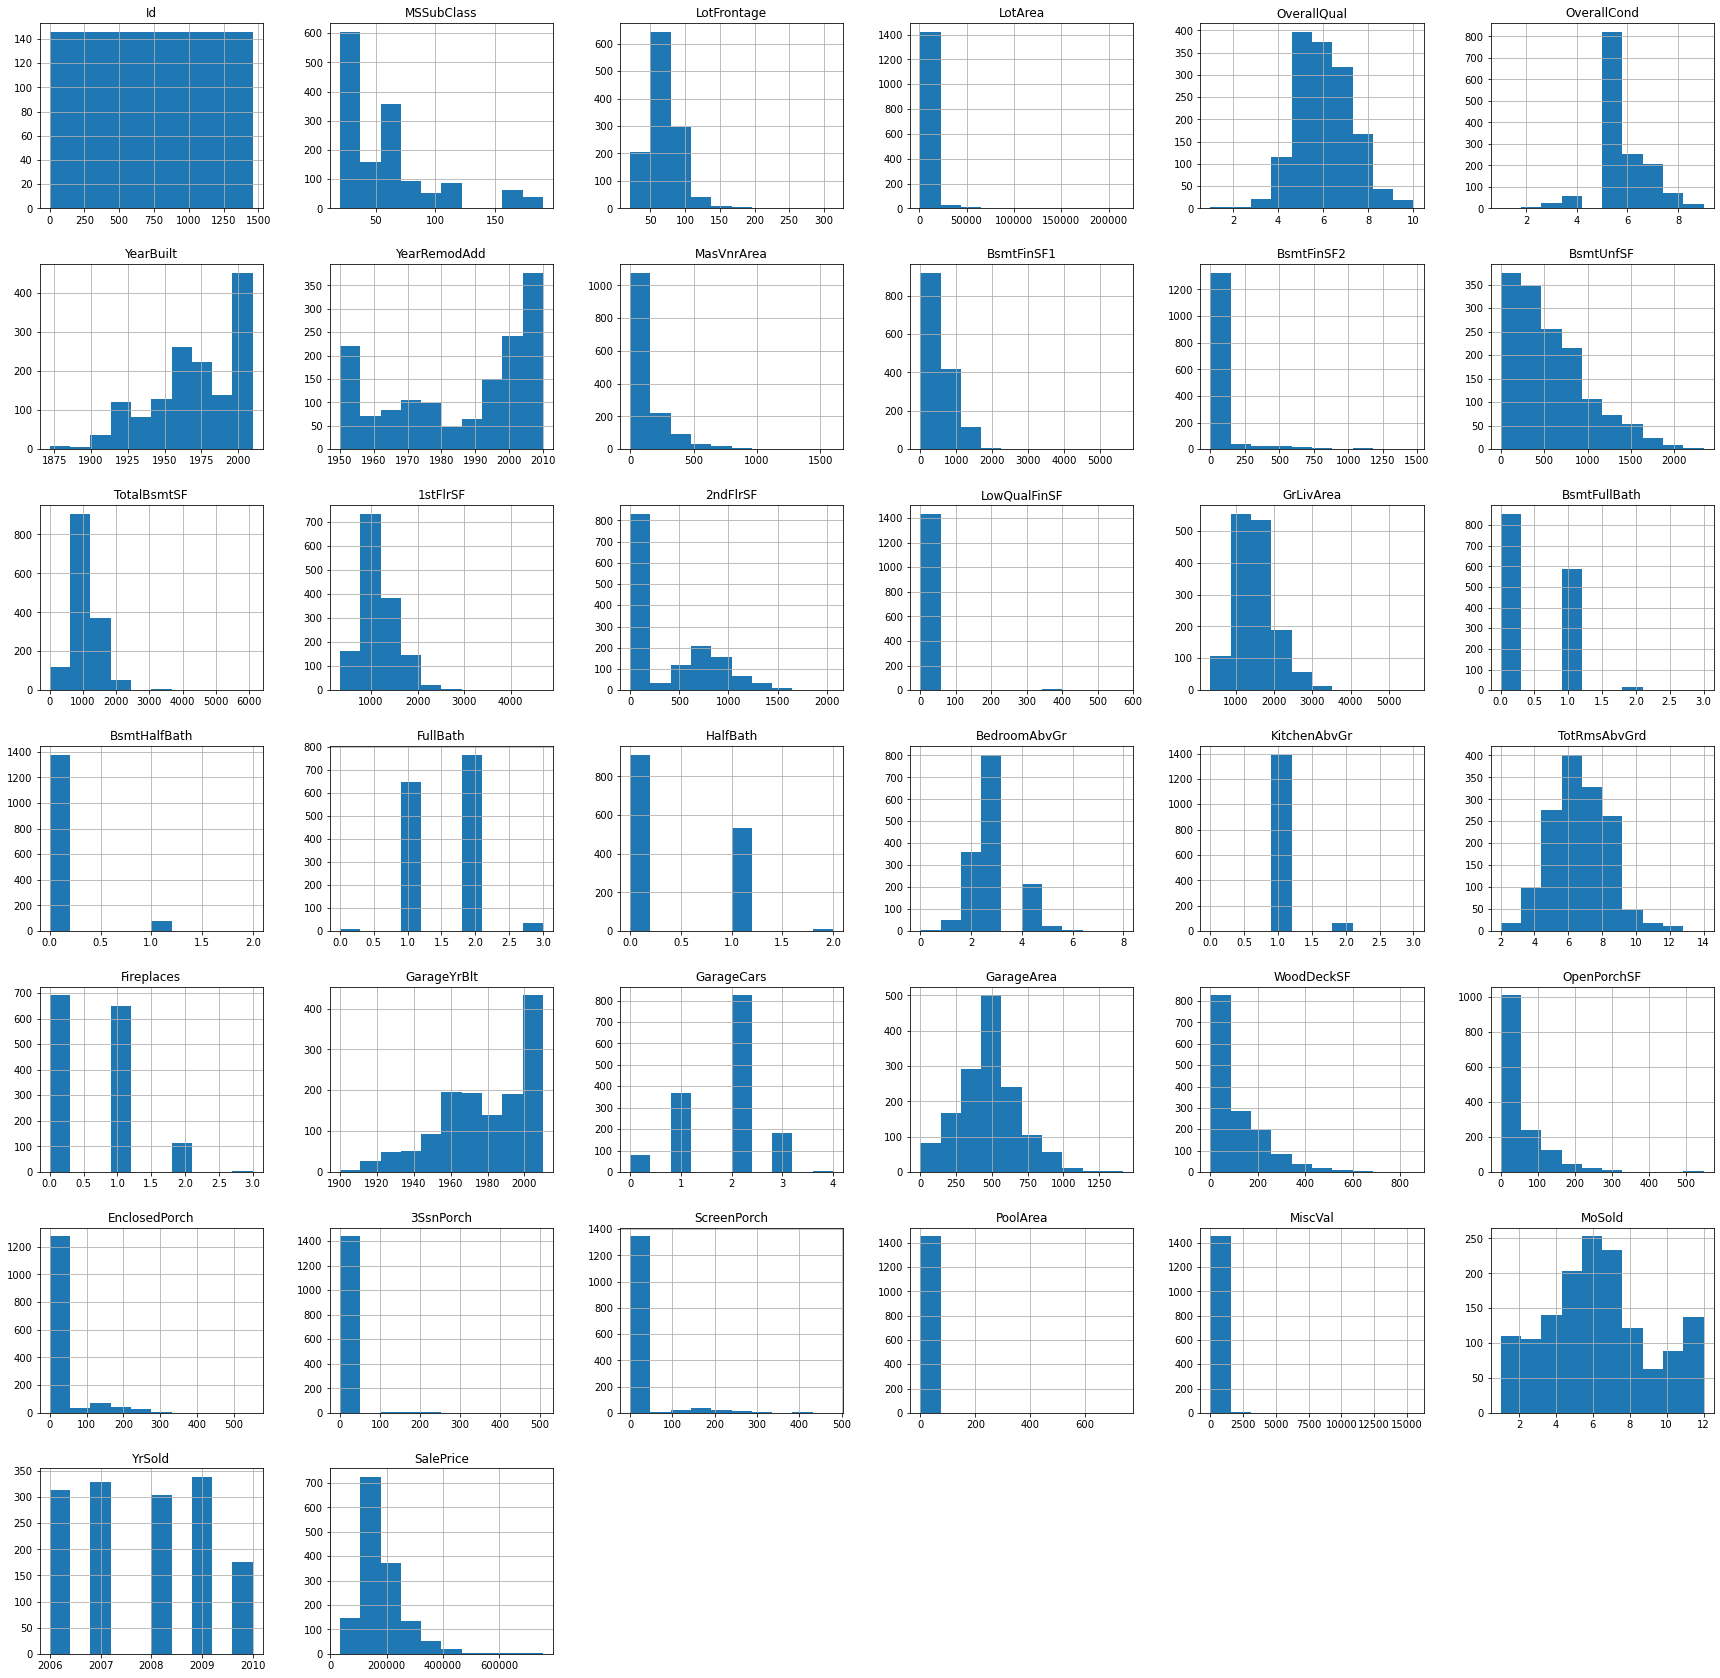

In [11]:
df.hist(column=numeric_cols.columns, figsize=(30, 30))

Les variables ayant une distribution proche de SalePrice, par une analyse visuelle, sont celles-ci
'LotFrontage','OverallQual','OverallCond','TotalBsmtSF','1stFlrSF','GrLivArea','BedroomAbvGr','TotRmsAbvGrd','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF'
On peut en déduire qu'elles ont une corrélation avec le prix de vente.


### Toujours sur les variables int64 + float64: Affichez les 10 variables les plus corrélées avec SalePrice (Avec Pandas il est possible de calculer les corrélations avec .corr()).

In [12]:
most_correlated = pd.Series(index=numeric_cols.columns, dtype='float64')
for x in most_correlated.index:
    most_correlated[x] = numeric_cols[x].corr(df.SalePrice)
most_correlated = most_correlated.sort_values(ascending=False)



In [13]:
print("Les variables les plus corrélées avec SalePrice sont :\n")

most_correlated.head(11)

Les variables les plus corrélées avec SalePrice sont :



SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
dtype: float64

Réalisez une heatmap afin de visualiser d'une autre manière les corrélations 2 à 2. Y'a t'il des variables fortement corrélées entre elles? Identifiez les 3 pairs les plus corrélées
    Sur cette sélection de variables: ['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice'] réalisez un regplot permettant de croiser ces variables avec SalePrice.
    En vous inspirant de: https://stackoverflow.com/questions/25579227/seaborn-implot-with-equation-and-r2-text Afficher le jointplot avec le coefficient de pearson pour le croisement SalePrice & GrLivArea.

​

### Toujours sur les variables int64 + float64: Réalisez un pairplot permettant d'afficher la relation entre SalePrice et les variables sélectionnés. Qu'elle est la forme des plot croisant les 3 variables les plus corrélées avec SalePrice?

In [14]:
type(numeric_cols)
numeric_cols.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  OpenPorchSF  \
0          2003       196.0         706  ...           0           61   
1          1976         0.0         978  ...         298            0   
2          2002       162.0         486  ...           0           42   
3          1970         0.0         216  ...           0           35   
4          2000       350.0         655  ...         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  

[5 rows x 38 columns]

In [151]:
print(numeric_cols['1stFlrSF'].isna().value_counts())
print(numeric_cols['GrLivArea'].isna().value_counts())

False    1460
Name: 1stFlrSF, dtype: int64
False    1460
Name: GrLivArea, dtype: int64


In [15]:
most_correlated.index

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1',
       'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'HalfBath',
       'LotArea', 'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr', 'ScreenPorch',
       'PoolArea', 'MoSold', '3SsnPorch', 'BsmtFinSF2', 'BsmtHalfBath',
       'MiscVal', 'Id', 'LowQualFinSF', 'YrSold', 'OverallCond', 'MSSubClass',
       'EnclosedPorch', 'KitchenAbvGr'],
      dtype='object')

In [16]:
most_correlated.head(11).index


Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')

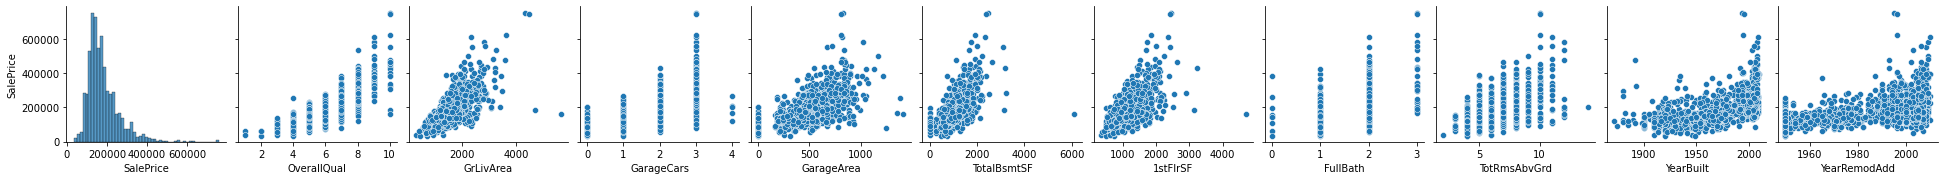

In [17]:
sns.pairplot(numeric_cols, x_vars=most_correlated.head(11).index
, y_vars='SalePrice')

Les 3 variables les plus corrélées avec SalePrice sont :
- OverallQual / Rates the overall material and finish of the house
- GrLivArea / Above grade (ground) living area square feet
- GarageCars / Size of garage in car capacity


Réalisez une heatmap afin de visualiser d'une autre manière les corrélations 2 à 2. Y'a t'il des variables fortement corrélées entre elles?
Identifiez les 3 paires les plus corrélées

<AxesSubplot:>

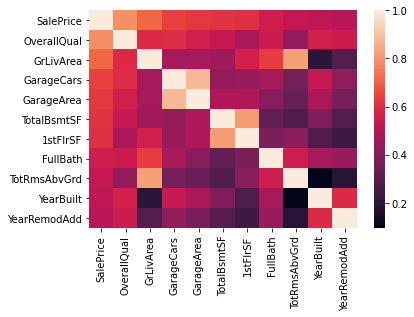

In [18]:
sns.heatmap(numeric_cols[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd']].corr())


Oui. Les carrés plus clairs indiquent les variables les plus corrélées entre elles.
Les 3 paires les plus corrélées sont:

- Size of garage in square feet / Size of garage in car capacity
- First Floor square feet / Total square feet of basement area
- Total rooms above grade (does not include bathrooms) / Above grade (ground) living area square feet

### Sur cette sélection de variables: ['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice'] réalisez un regplot permettant de croiser ces variables avec SalePrice.

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

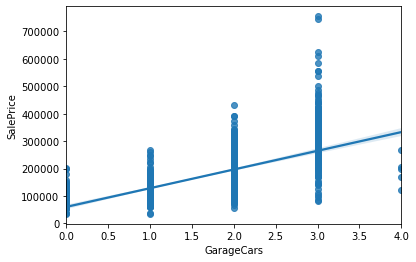

In [19]:
sns.regplot(data=numeric_cols[['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice']], x=numeric_cols.GarageCars, y=numeric_cols.SalePrice)

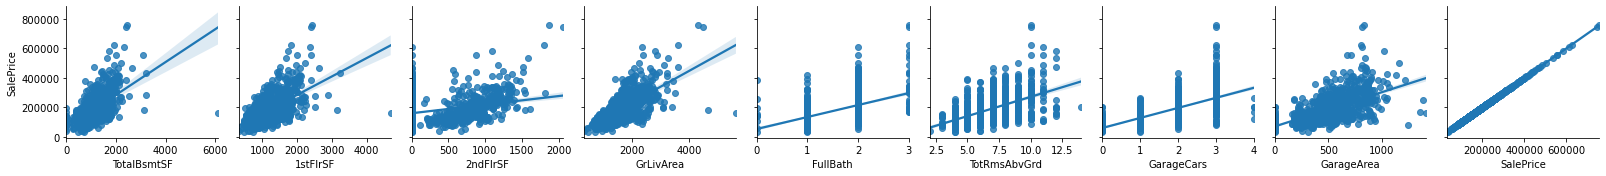

In [20]:
g = sns.PairGrid(data=numeric_cols, y_vars='SalePrice', x_vars=['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice'])
g.map(sns.regplot)


En vous inspirant de: https://stackoverflow.com/questions/25579227/seaborn-implot-with-equation-and-r2-text Afficher le jointplot avec le coefficient de pearson pour le croisement SalePrice & GrLivArea.

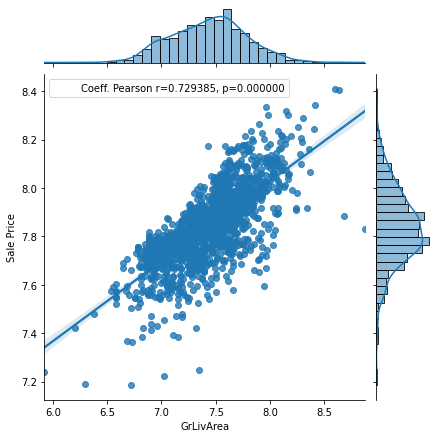

In [21]:
xt, _ = stats.boxcox(numeric_cols["GrLivArea"])
yt, _ = stats.boxcox(numeric_cols["SalePrice"])
g = sns.jointplot(data=numeric_cols, kind='reg', x=xt, y=yt)
g.set_axis_labels("GrLivArea", "Sale Price")

r, p = stats.pearsonr(xt, yt)
phantom, = g.ax_joint.plot([], [], linestyle="", alpha=0)
g.ax_joint.legend([phantom],['Coeff. Pearson r={:f}, p={:f}'.format(r,p)])

### Choix du modèle de machine learning

## Préparation des données

### a. échantillonnage

### b. Sélection de la variable cible et des variables explicatives

In [22]:
df = numeric_cols

La variable cible est le prix de la maison.

Les variables explicatives sont la superficie habitable au-dessus du sol en pieds carrés, la qualité des matériaux et de la finition et le nombre de places de parking.

In [23]:
y = df.SalePrice

In [24]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [25]:
X = df[['OverallQual','GrLivArea','GarageCars']]
#X = df[['GrLivArea']]

In [26]:
X

OverallQual  GrLivArea  GarageCars
0               7       1710           2
1               6       1262           2
2               7       1786           2
3               7       1717           3
4               8       2198           3
...           ...        ...         ...
1455            6       1647           2
1456            6       2073           2
1457            7       2340           1
1458            5       1078           1
1459            5       1256           1

[1460 rows x 3 columns]

## Division du jeu de données en training/validation/testing sets

In [27]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, train_size=0.8)

## Apprentissage sur le training set

### On implémente la régression linéaire

In [28]:

from sklearn import linear_model
from sklearn.metrics import r2_score
regr = linear_model.LinearRegression()

list = [xtrain, ytrain]

regr.fit(*list)

print("Régression linéaire")
print(f"Les coefficients de régression sont : {regr.coef_}")
print(f"L'ordonnée à l'origine est : {round(regr.intercept_)}\n")

#print(regr.predict(xtrain))



ridge_regr = linear_model.Ridge(alpha=.5)
ridge_regr.fit(*list)

print("Ridge")
print(f"Les coefficients de régression sont : {ridge_regr.coef_}")
print(f"L'ordonnée à l'origine est : {round(ridge_regr.intercept_)}\n")


lasso_regr = linear_model.Lasso(alpha=0.1)
lasso_regr.fit(*list)

print("Lasso")
print(f"Les coefficients de régression sont : {lasso_regr.coef_}")
print(f"L'ordonnée à l'origine est : {round(lasso_regr.intercept_)}\n")




Régression linéaire
Les coefficients de régression sont : [26663.15202953    47.91958757 22348.16810863]
L'ordonnée à l'origine est : -93267

Ridge
Les coefficients de régression sont : [26659.2881434     47.9390053  22329.52918878]
L'ordonnée à l'origine est : -93240

Lasso
Les coefficients de régression sont : [26663.13743661    47.91976391 22347.95278774]
L'ordonnée à l'origine est : -93267



In [29]:
qual_to_predict = 7
area_to_predict = 1076
garage_to_predict = 2

x_df =  pd.DataFrame({'OverallQual': [qual_to_predict],'GrLivArea': [area_to_predict],'GarageCars': [garage_to_predict]})

ytrainpred = regr.predict(xtrain)
ytraintest = regr.predict(xtest)

In [30]:
xytrain = xtrain.join(ytrain)

In [31]:
xytrain['prediction'] = ytrainpred

In [32]:
xytrain.head()

OverallQual  GrLivArea  GarageCars  SalePrice     prediction
803             9       2822           3     582933  348975.112489
877             9       2224           3     350000  320319.199122
787             7       2084           2     233000  237935.984695
732             7       2031           2     222500  235396.246553
1354            7       1865           3     235000  249789.763125

In [33]:
xytrain['delta'] = xytrain.apply((lambda x : abs(x.SalePrice - round(x.prediction))) , axis=1)
xytrain.head()
xytrain.describe()


OverallQual    GrLivArea   GarageCars      SalePrice     prediction  \
count  1168.000000  1168.000000  1168.000000    1168.000000    1168.000000   
mean      6.109589  1518.006849     1.765411  181830.028253  181830.028253   
std       1.400200   518.670663     0.759810   78417.190129   67701.205319   
min       1.000000   334.000000     0.000000   34900.000000  -50598.541948   
25%       5.000000  1127.500000     1.000000  130000.000000  130519.751097   
50%       6.000000  1470.500000     2.000000  164000.000000  180436.578064   
75%       7.000000  1787.250000     2.000000  215400.000000  225493.837158   
max      10.000000  5642.000000     4.000000  611657.000000  488423.333358   

               delta  
count    1168.000000  
mean    27493.458904  
std     28447.586740  
min         6.000000  
25%      9593.500000  
50%     20596.000000  
75%     35498.750000  
max    328423.000000

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(f'R2 : {r2_score(ytrain, ytrainpred)}')
print(f'Mean absolute error : {mean_absolute_error(ytrain, ytrainpred)}')
print(f'Root mean squared error : {mean_squared_error(ytrain, ytrainpred, squared=False)}')

R2 : 0.7453671500439123
Mean absolute error : 27493.440109524705
Root mean squared error : 39553.27953043422


In [35]:
mean_absolute_error(ytest, ytraintest)

27142.015560690154

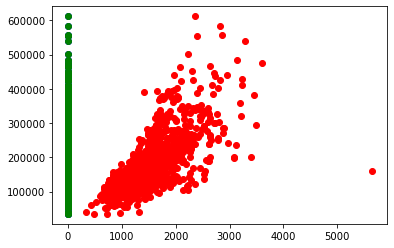

In [36]:

# Plot outputs
plt.scatter(xtrain['GrLivArea'], ytrain,  color='red')
plt.scatter(xtrain['OverallQual'], ytrain,  color='blue')
plt.scatter(xtrain['GarageCars'], ytrain,  color='green')

plt.show()



# Variables catégorielles

### Sélection des variables catégorielles

In [41]:
df = pd.read_csv(r"/home/apprenant/simplon_projects/house_price/data/train.csv")

In [42]:
categorical_cols = df.select_dtypes(include=[ 'object' ])

In [43]:
categorical_cols.head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1  ... GarageType GarageFinish GarageQual GarageCond  \
0      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
1      Veenker      Feedr  ...     Attchd          RFn         TA         TA   
2      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
3      Crawfor       Norm  ...     Detchd          Unf         TA         TA   
4      NoRidge       Norm  ...     Attchd          RFn         TA         TA   

  PavedDrive PoolQC Fence MiscFeature SaleType SaleCondition  
0          Y    NaN   NaN         NaN       WD        Normal  
1          Y    NaN   NaN         NaN       WD        Normal  
2          Y    NaN   NaN         NaN       WD        Normal  
3          Y    NaN   NaN         NaN       WD       Abnorml  
4          Y    NaN   NaN         NaN       WD        Normal  

[5 rows x 43 columns]

In [56]:
categorical_cols.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [65]:
#fig, axs = plt.subplot(13, 3, figsize=(20,60))
#ax_iter = iter(axs.flat)

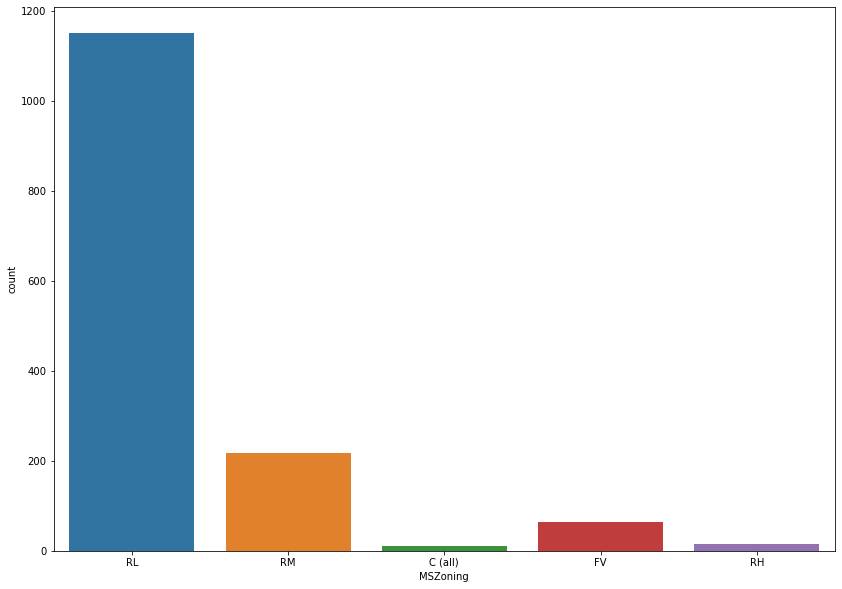

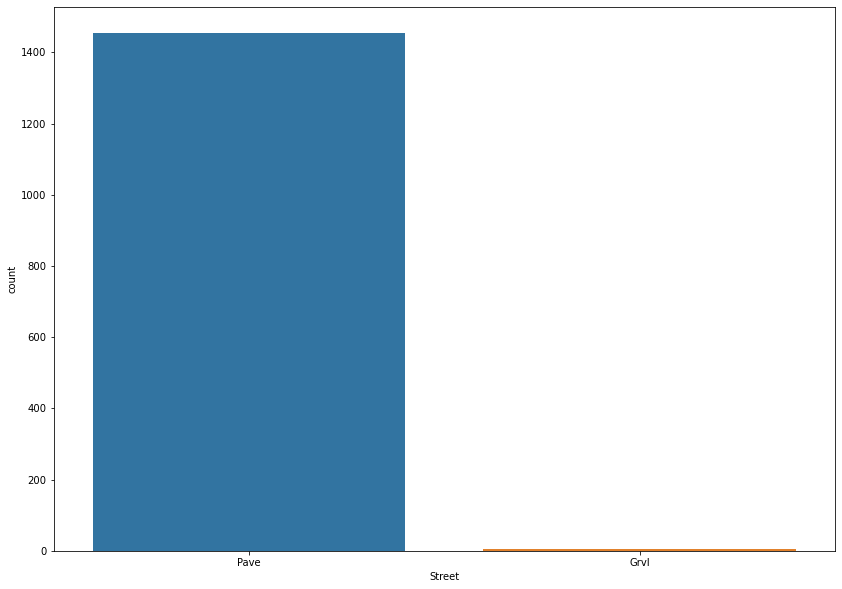

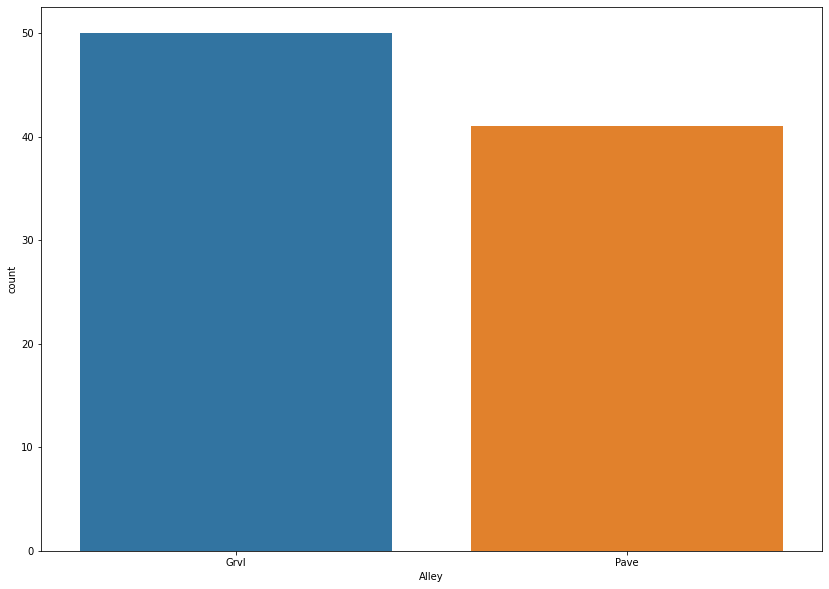

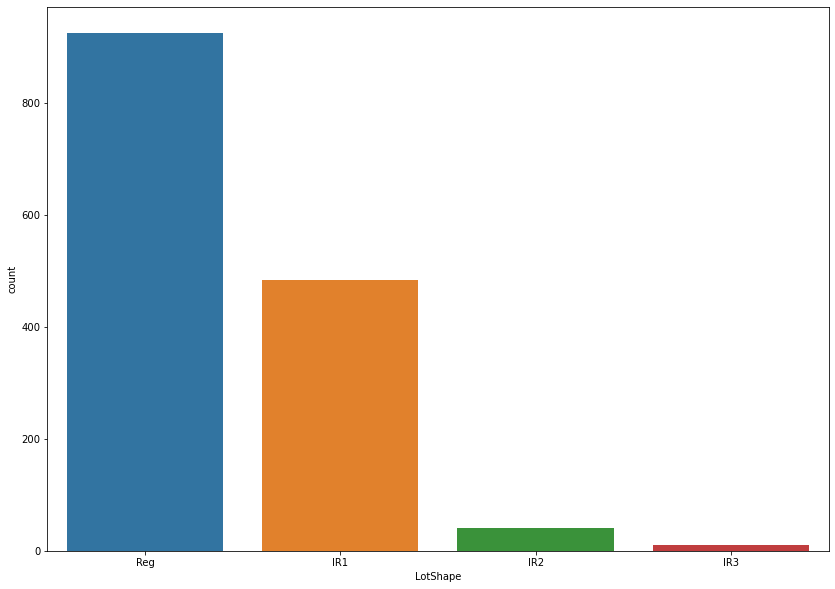

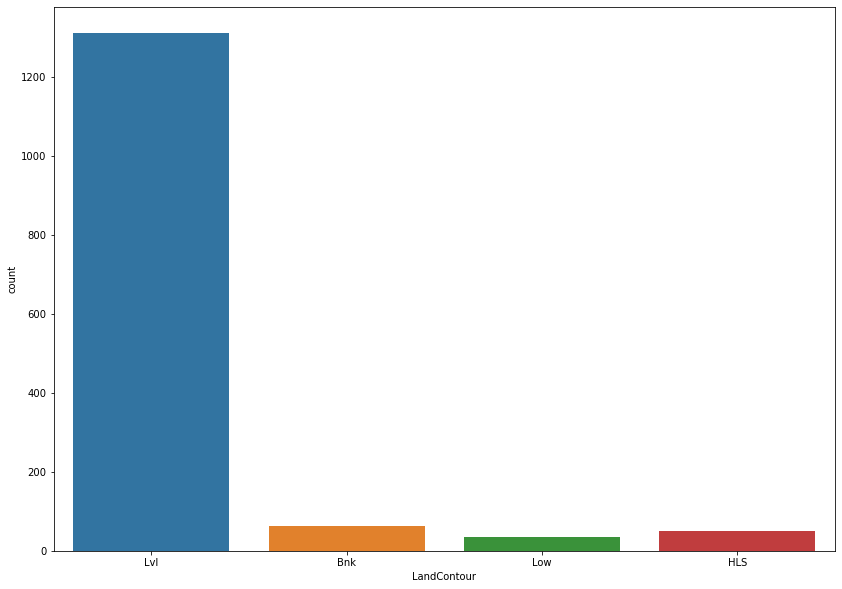

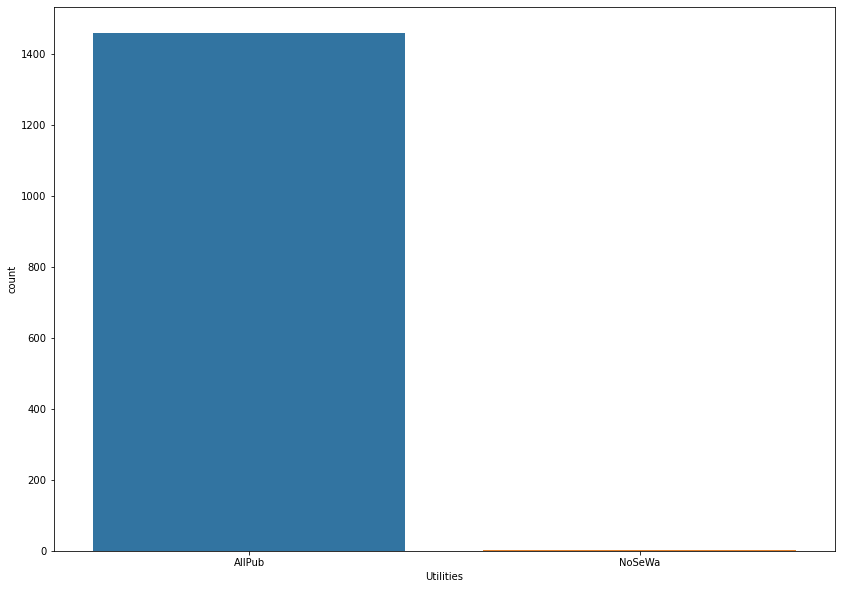

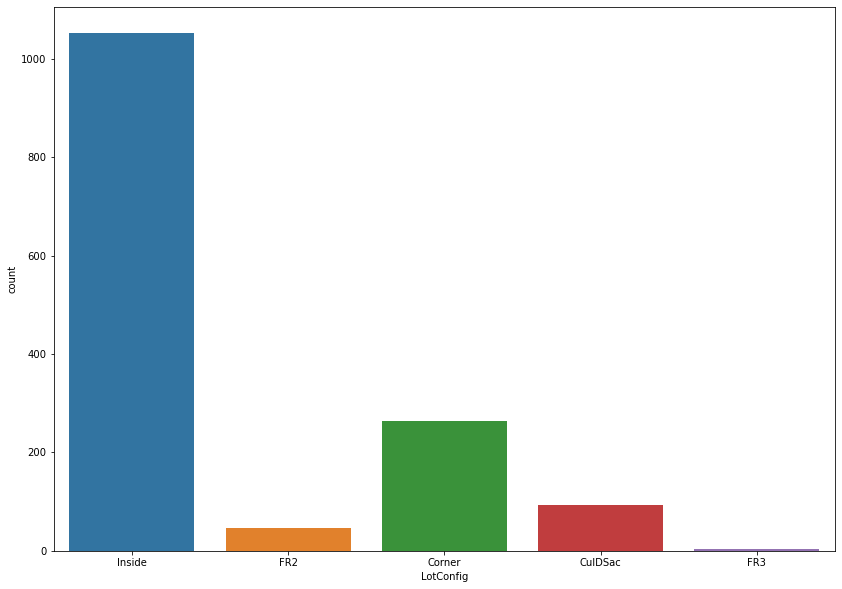

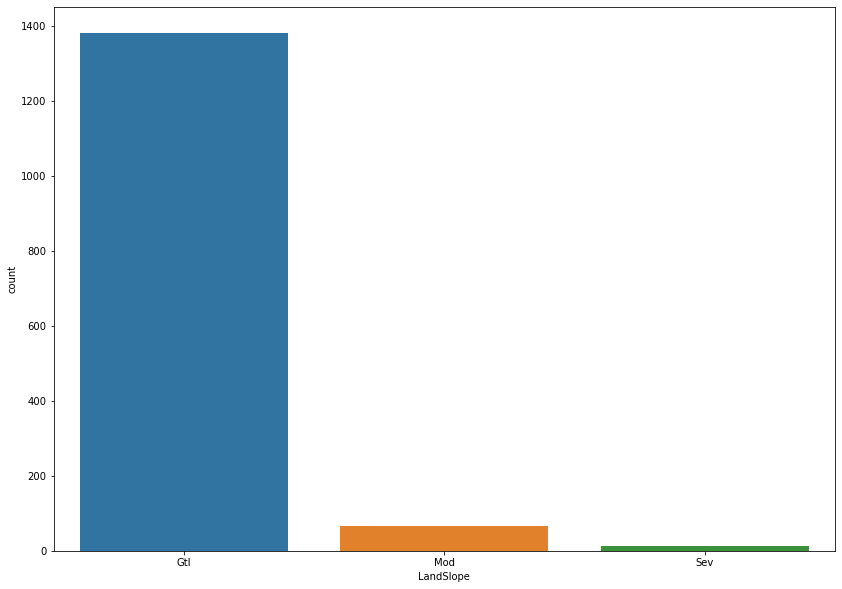

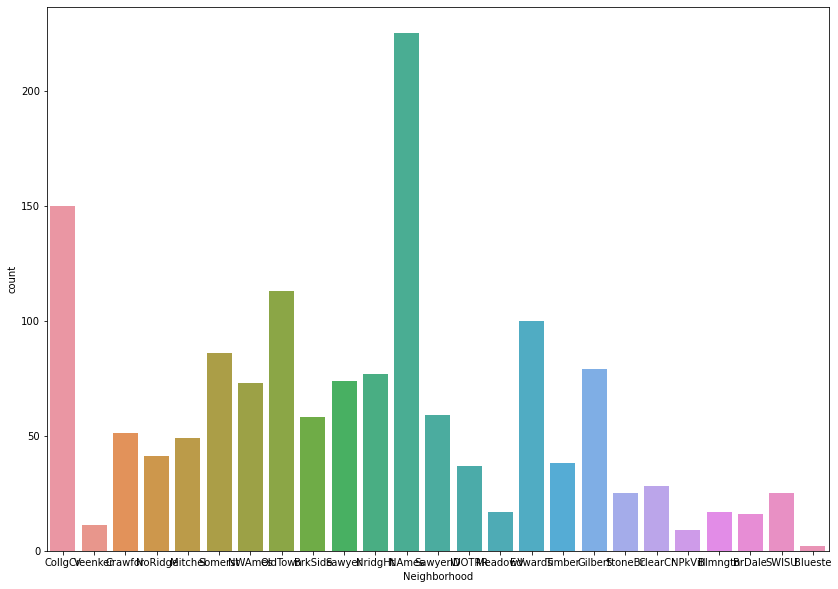

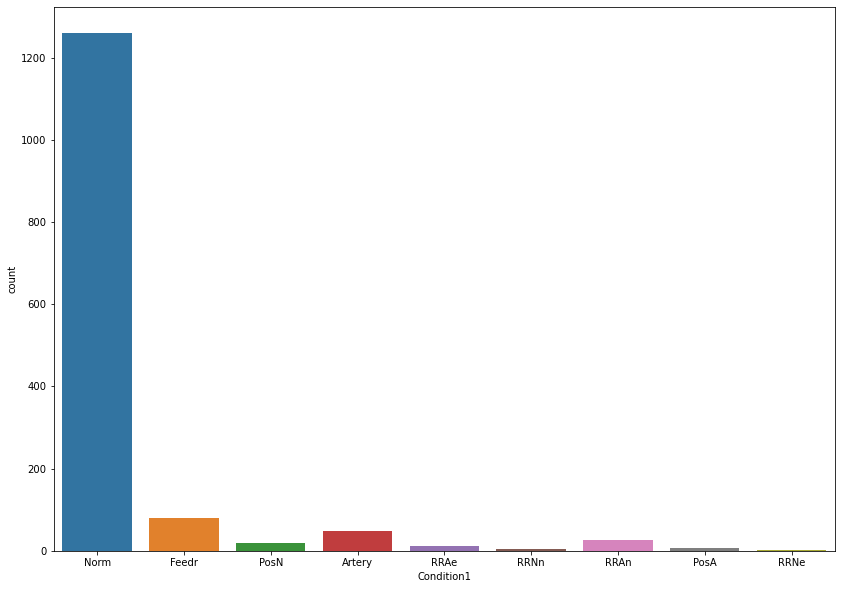

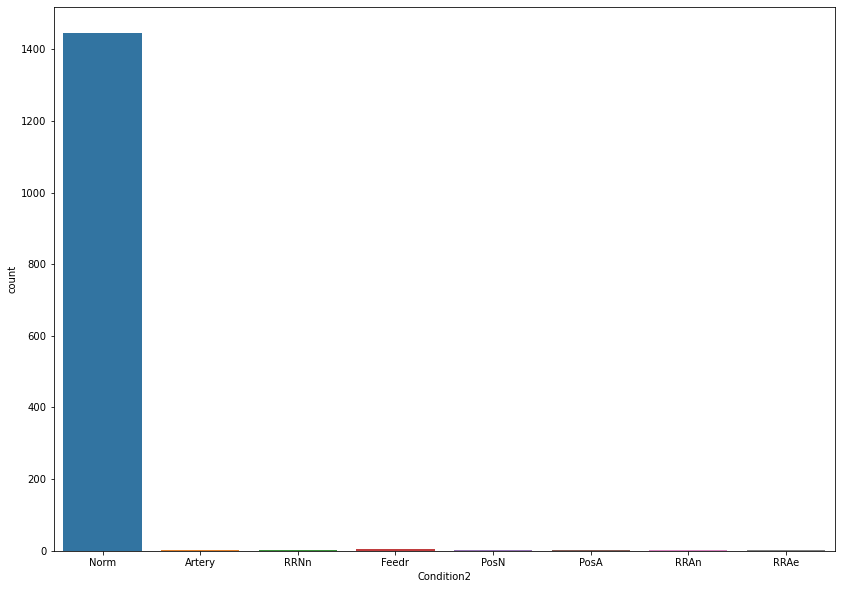

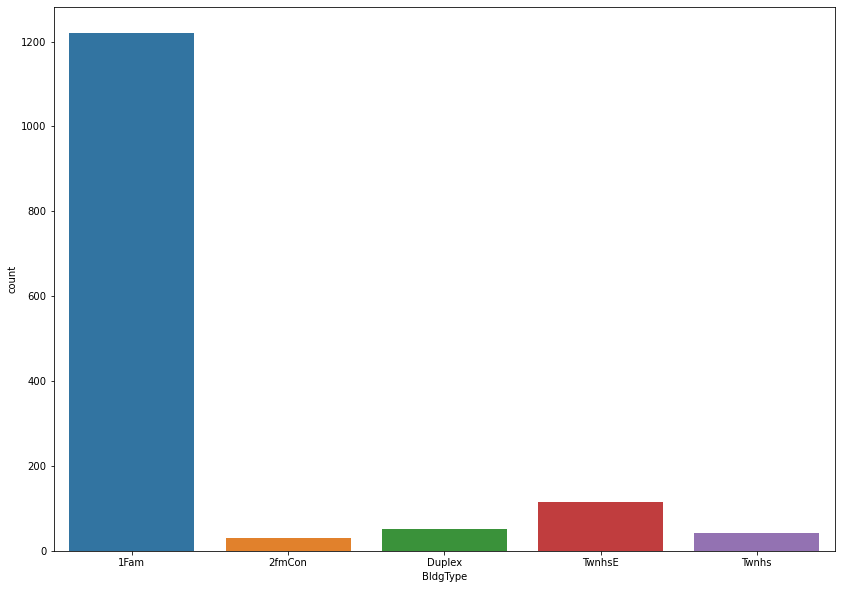

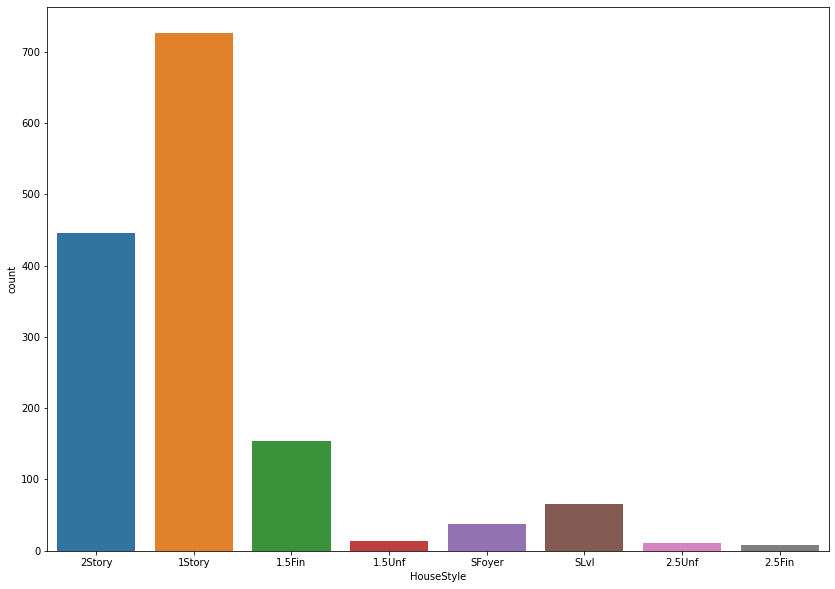

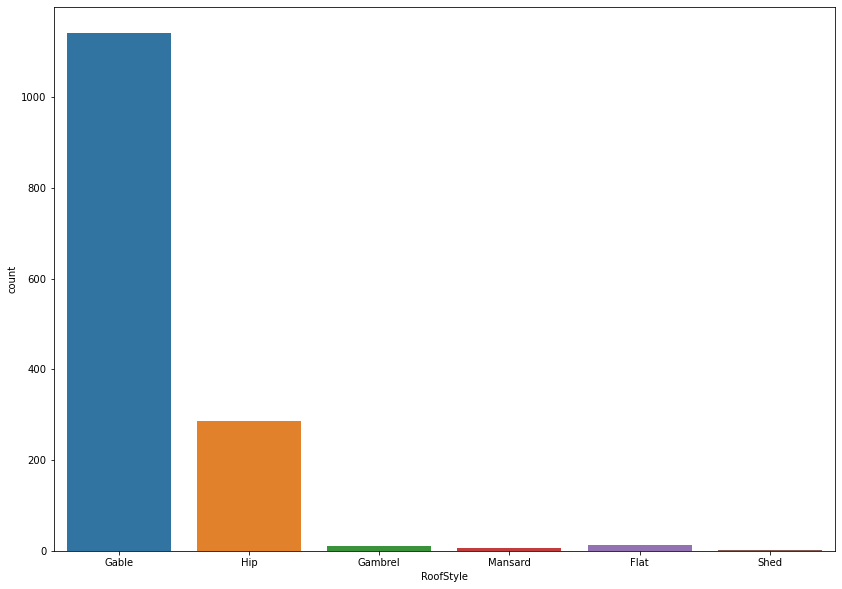

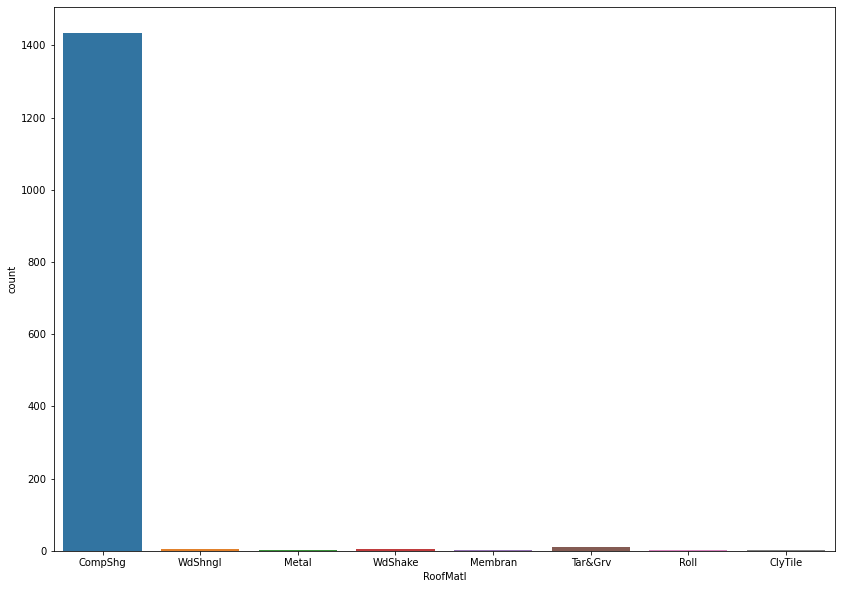

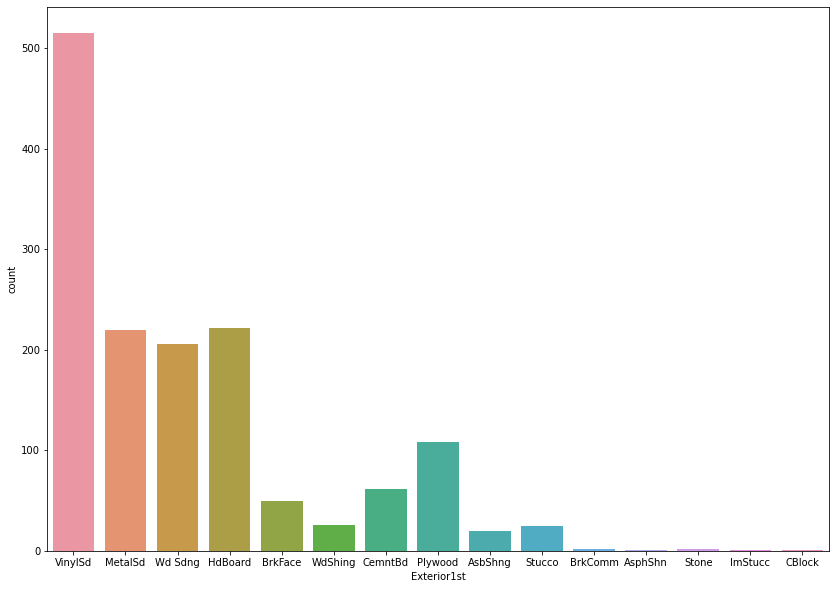

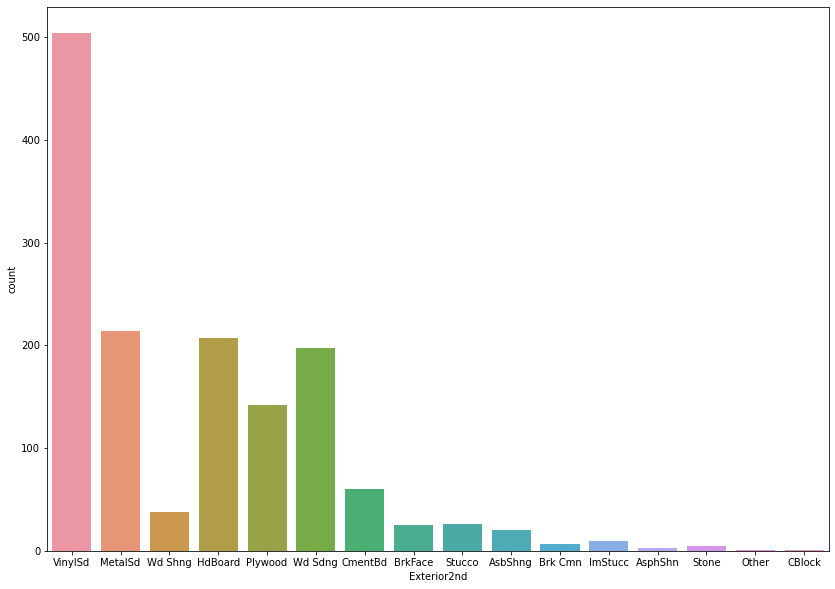

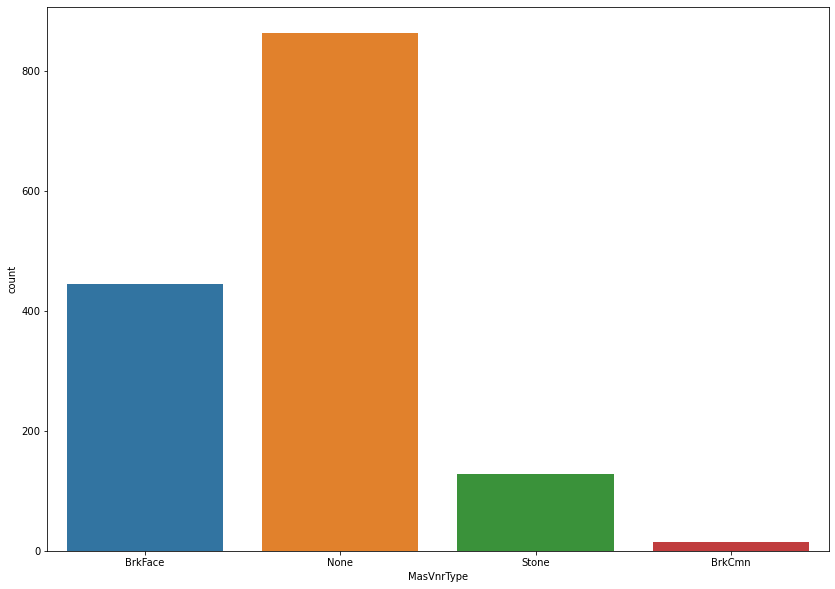

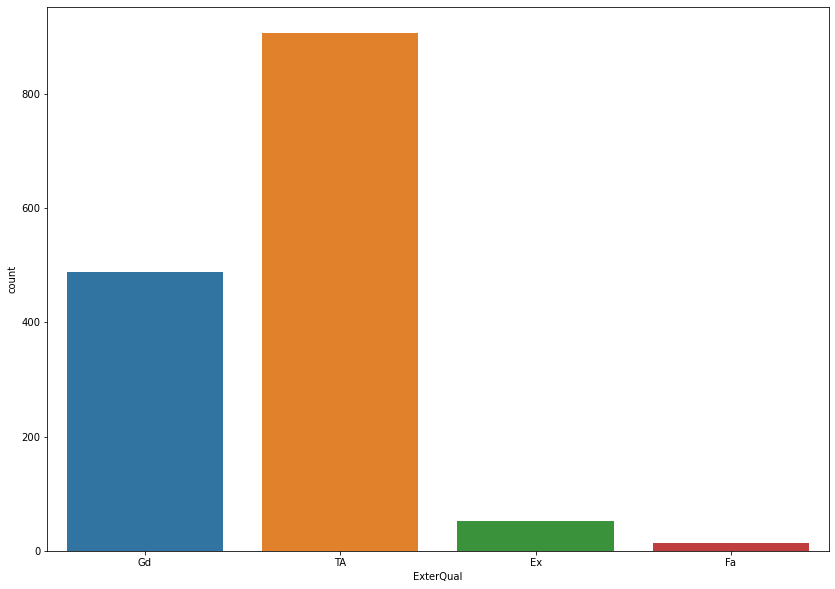

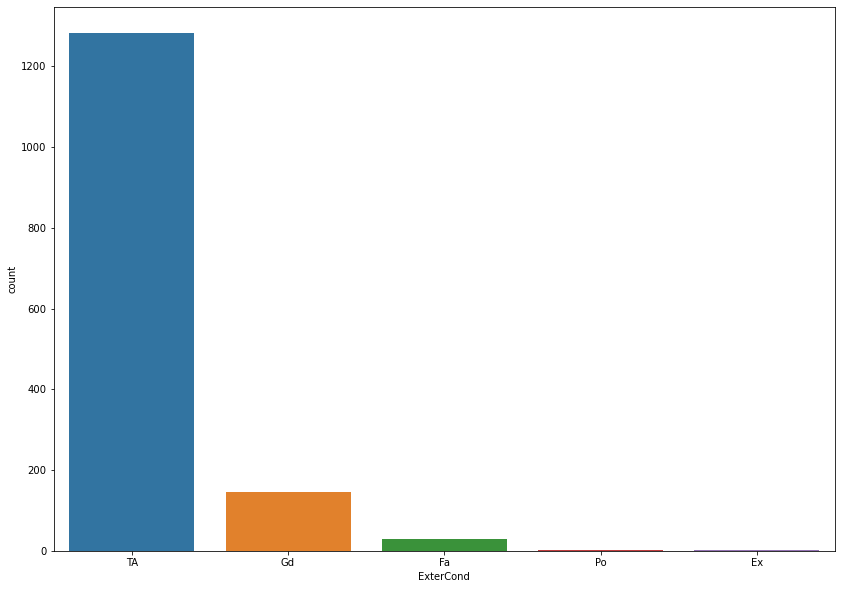

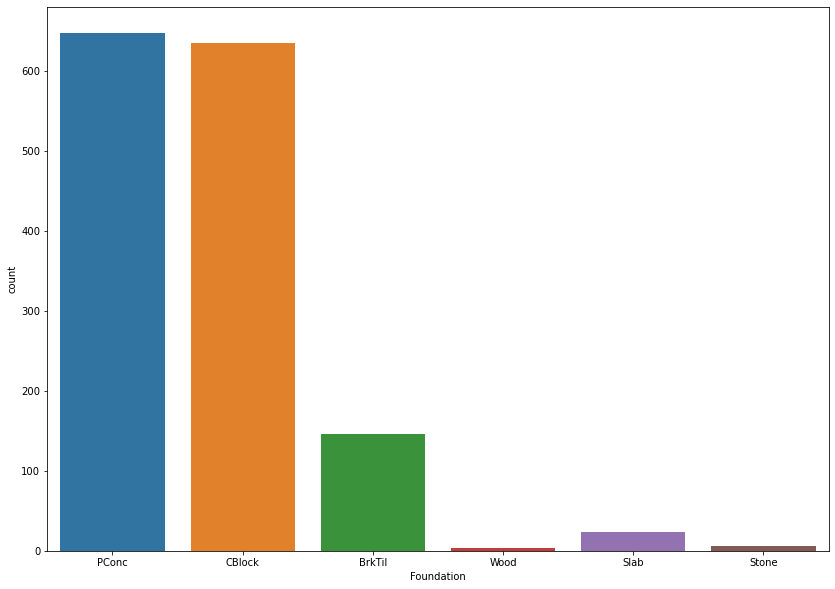

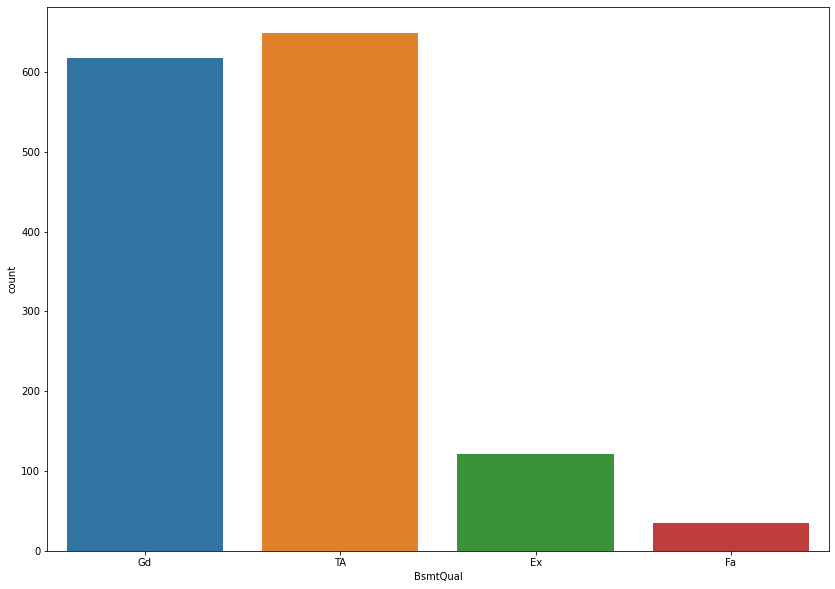

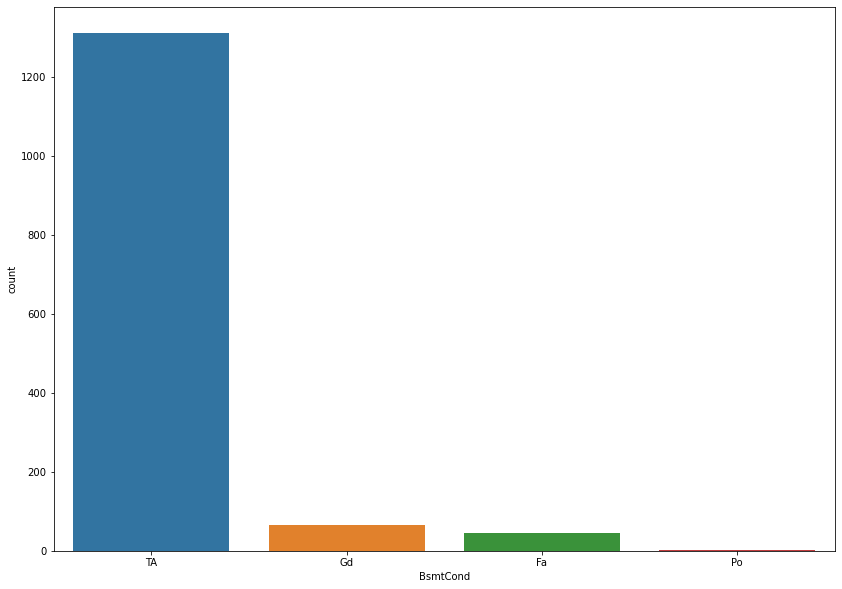

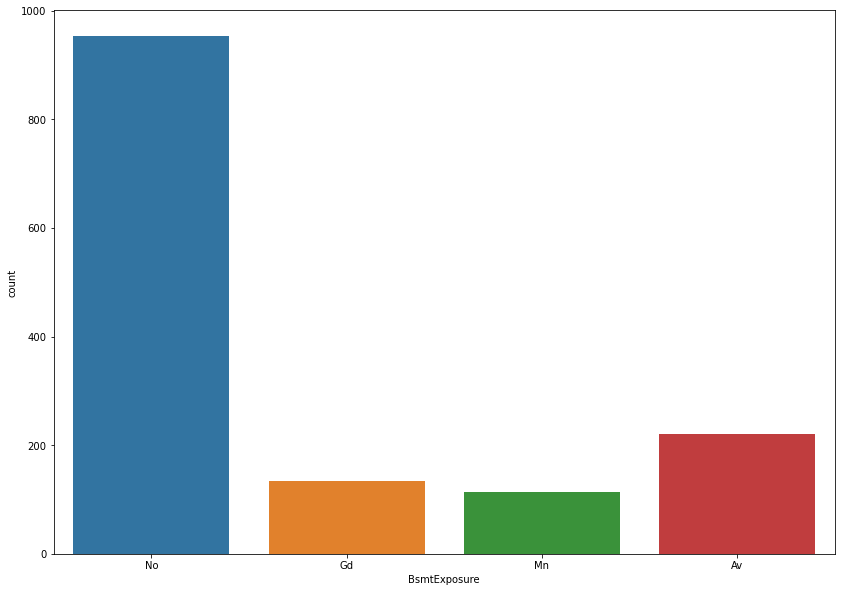

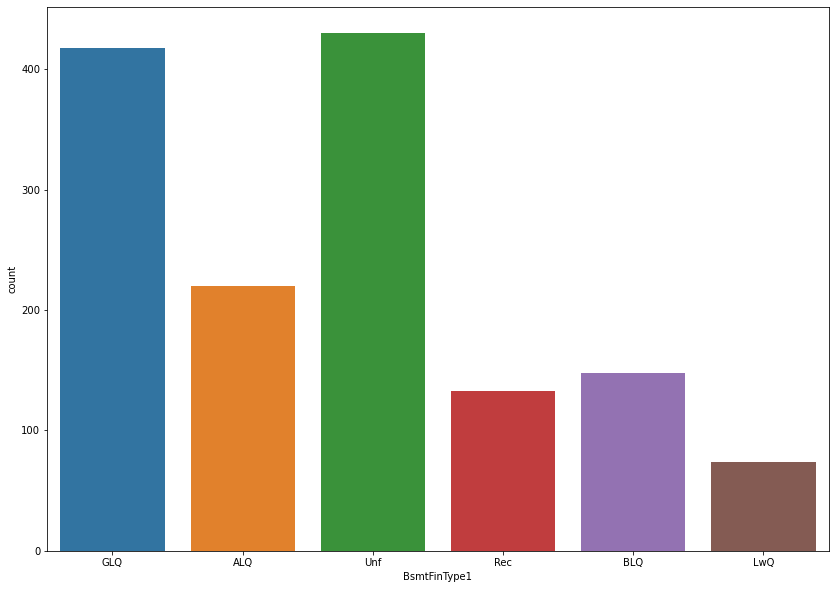

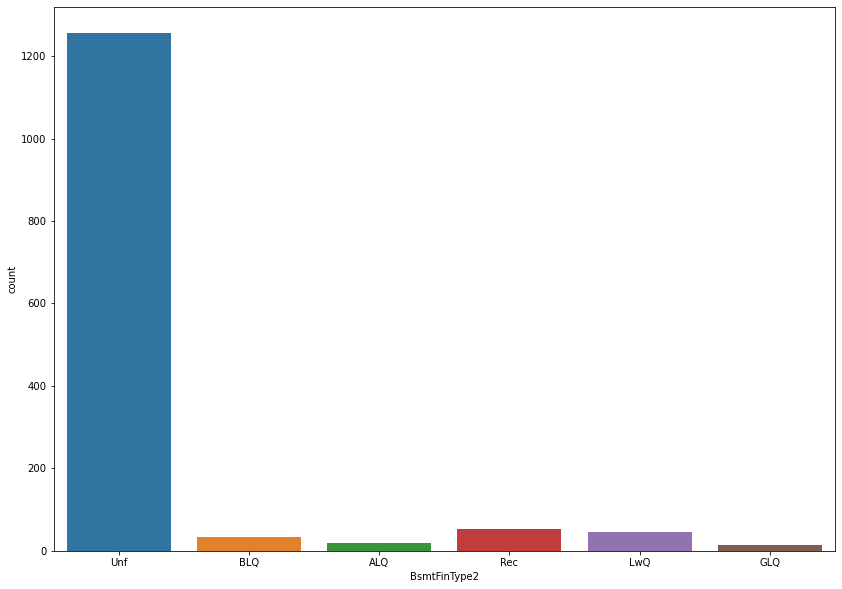

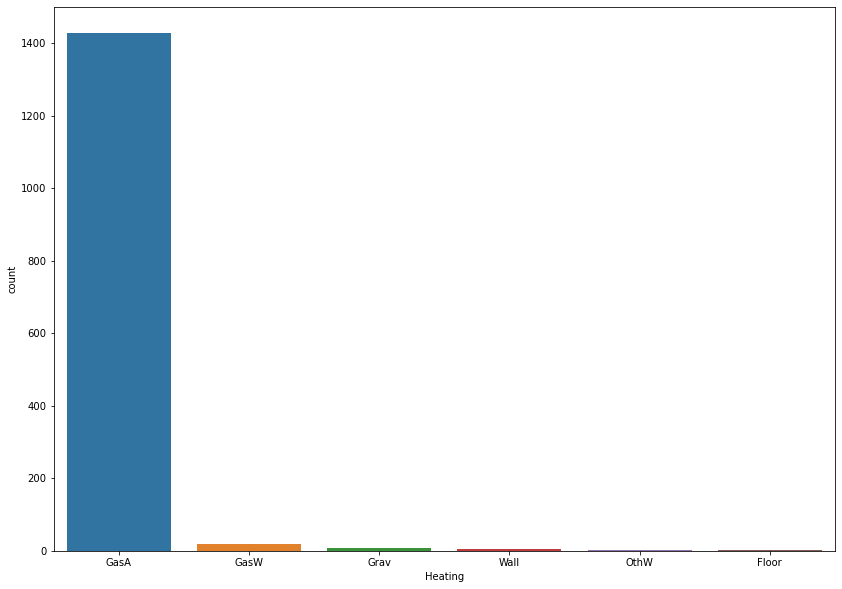

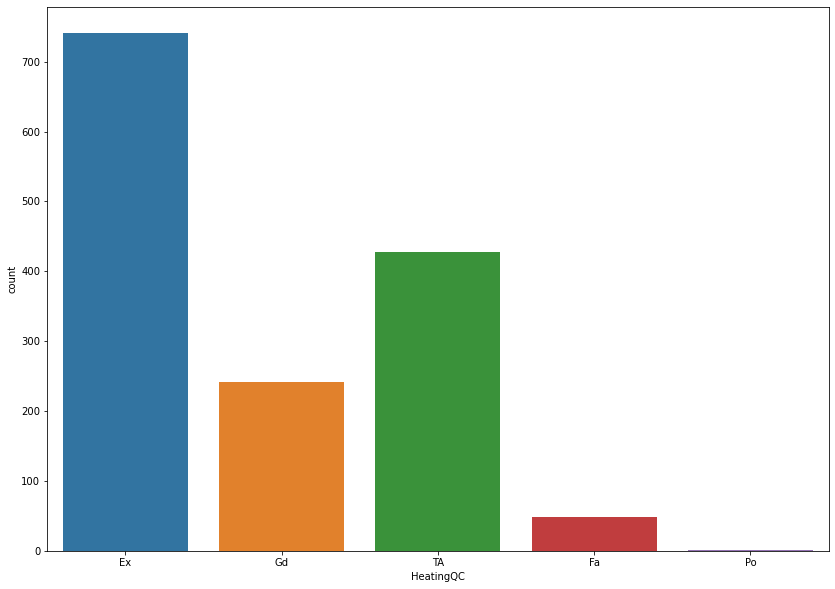

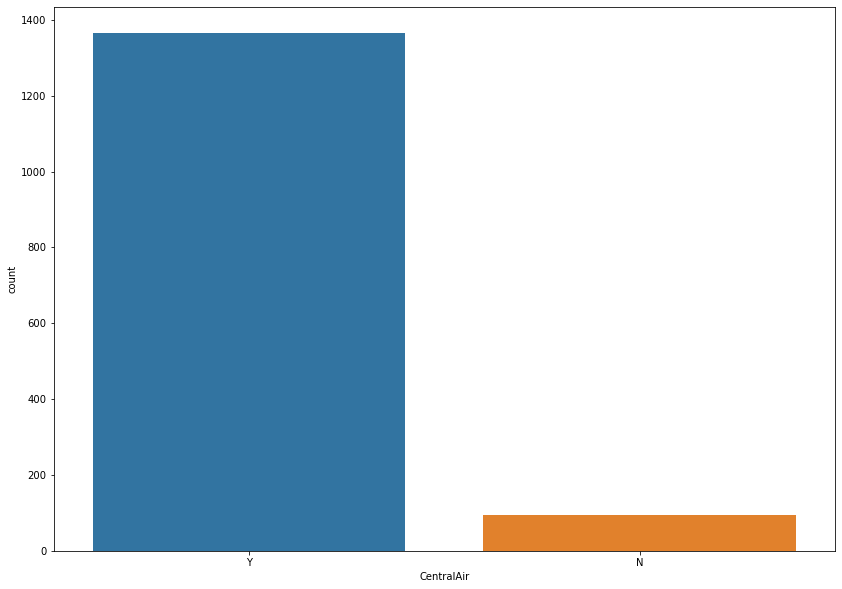

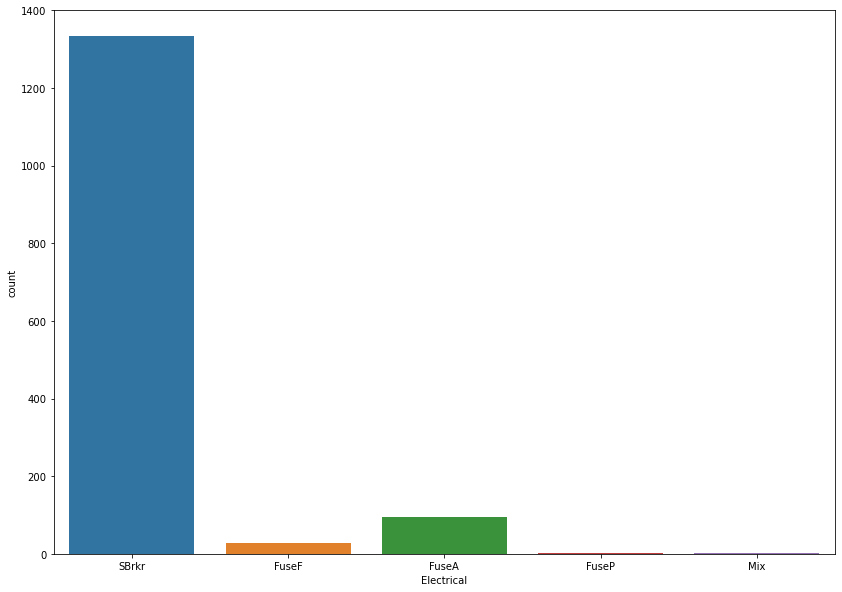

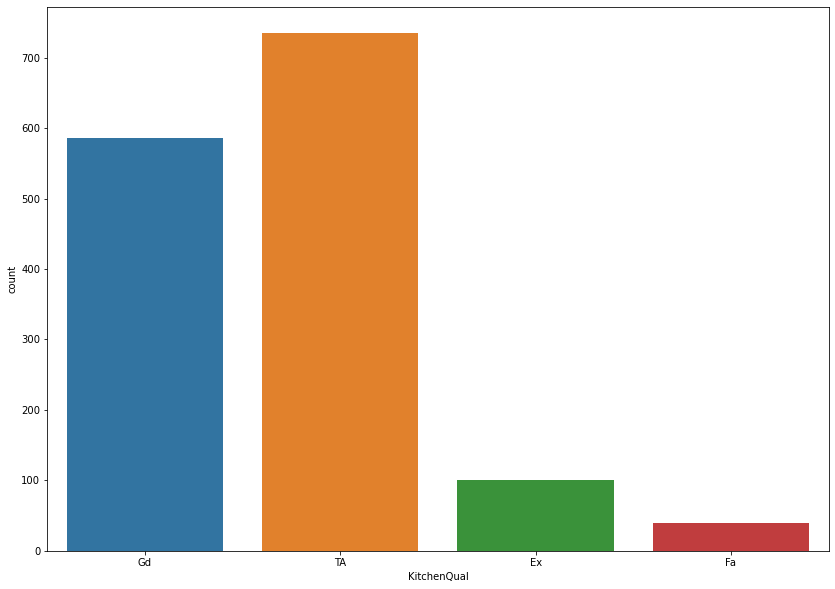

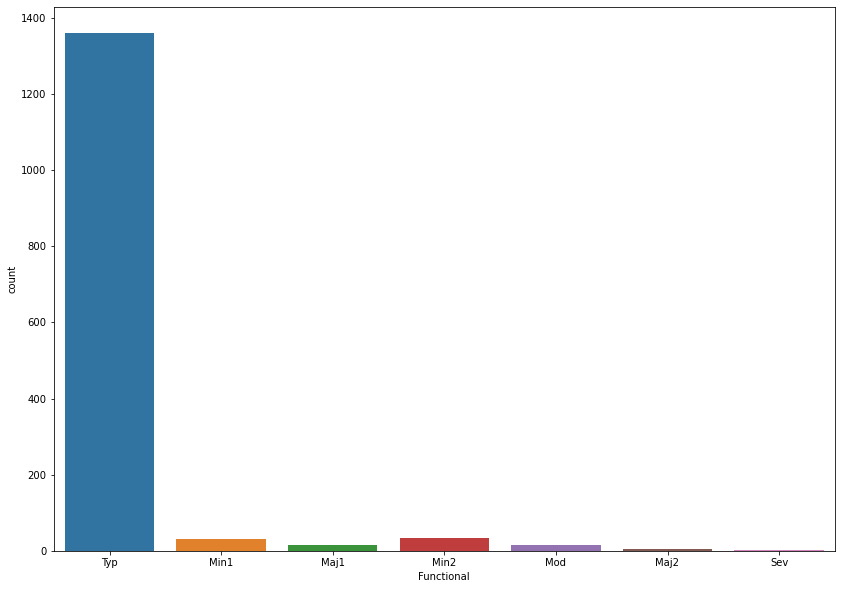

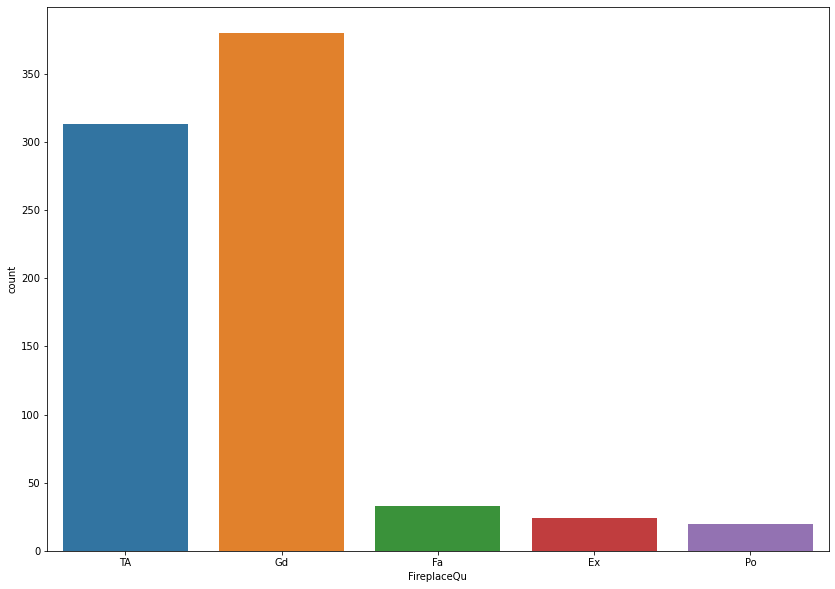

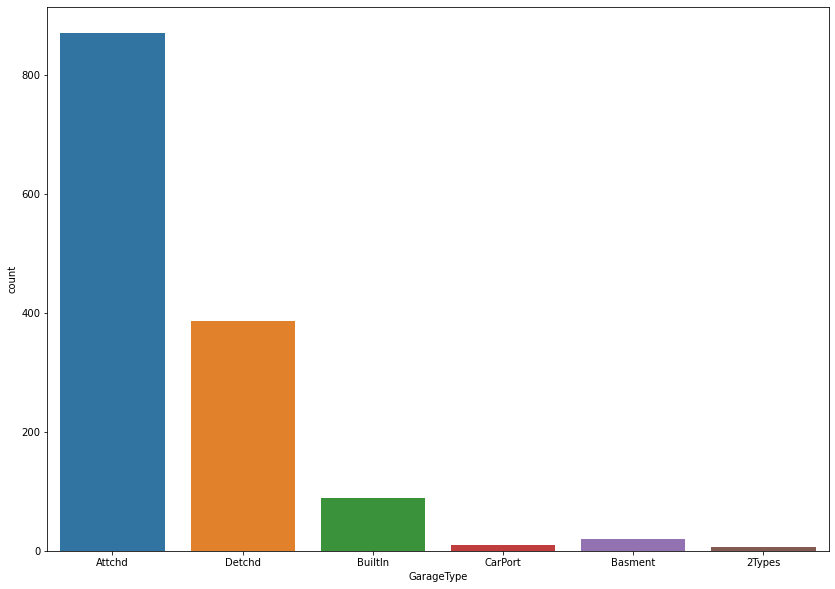

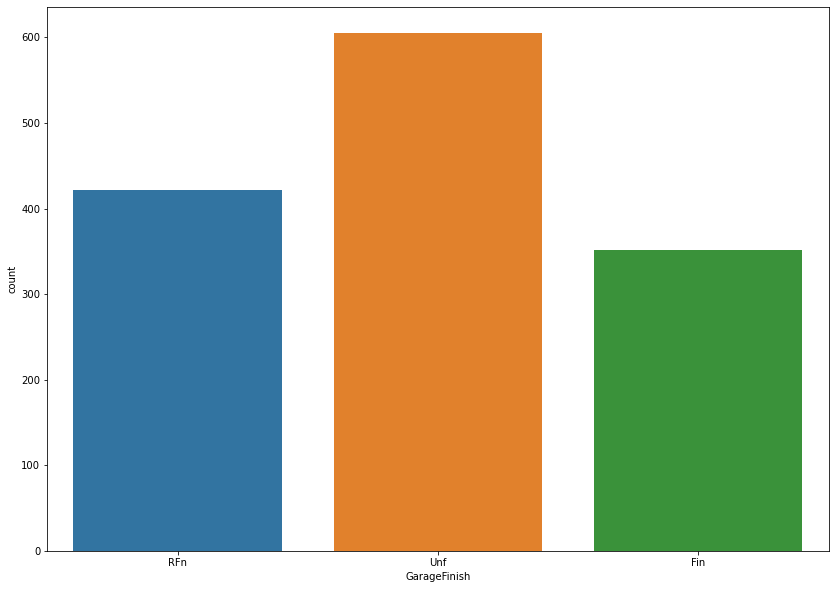

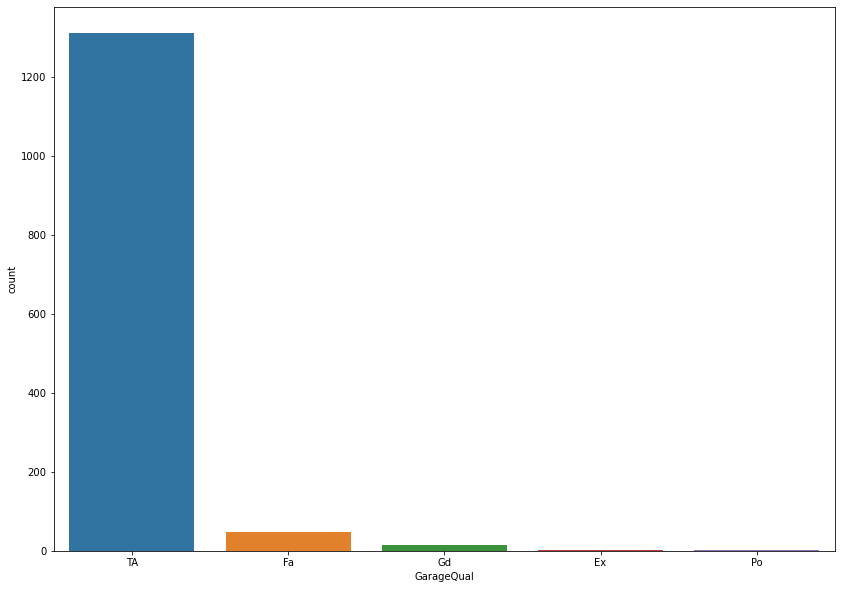

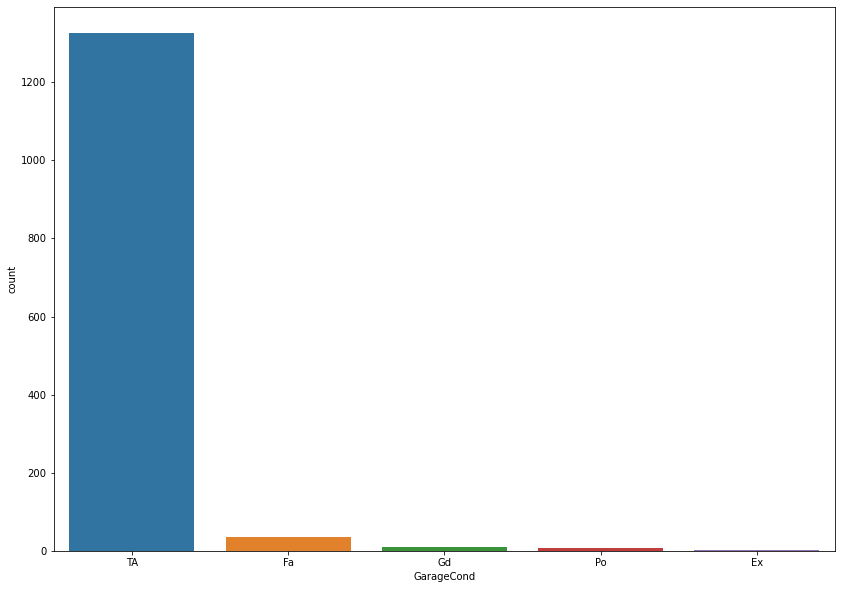

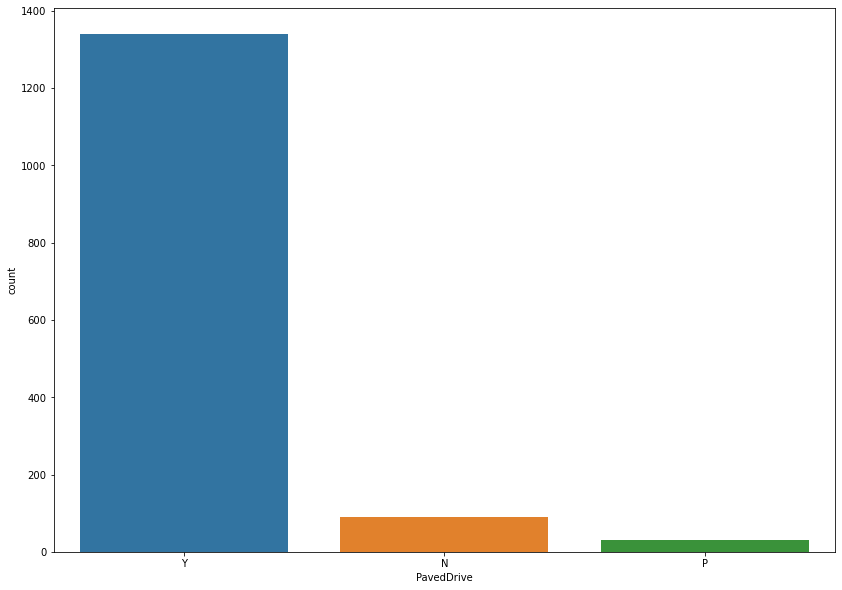

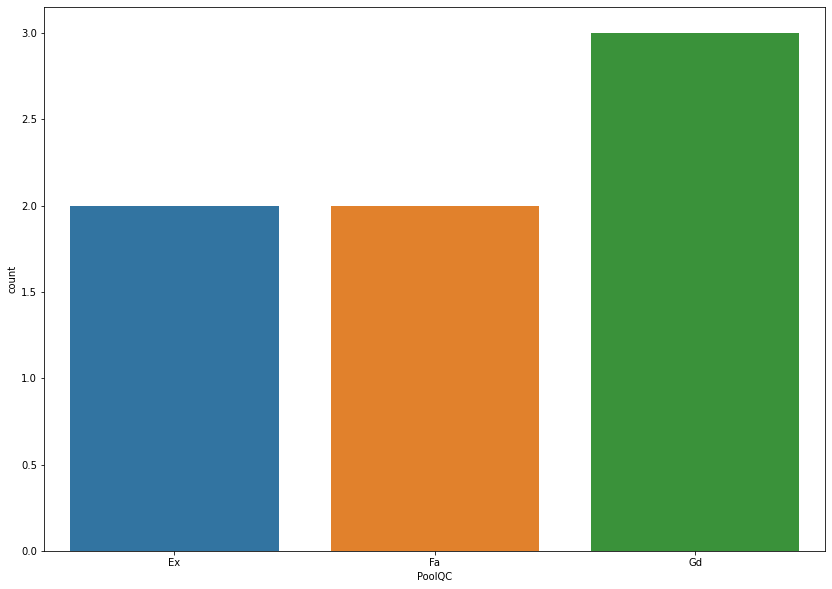

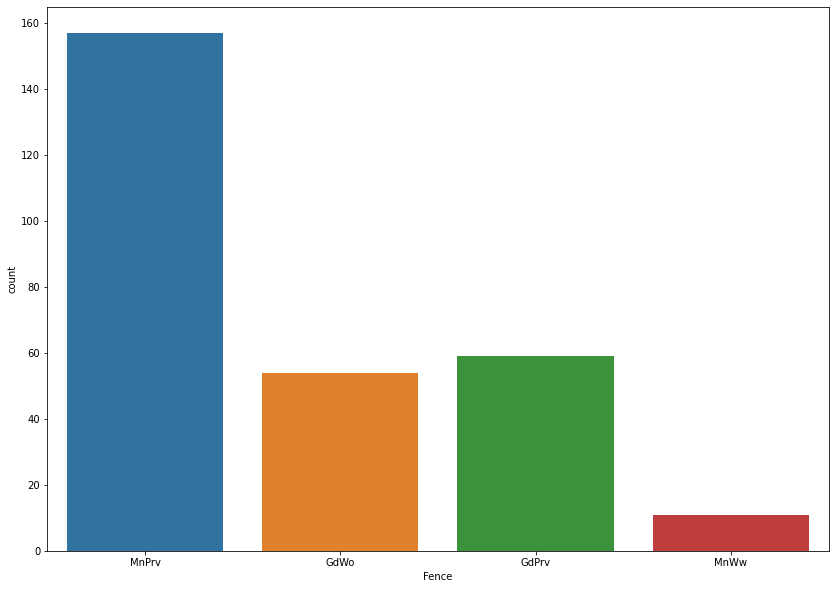

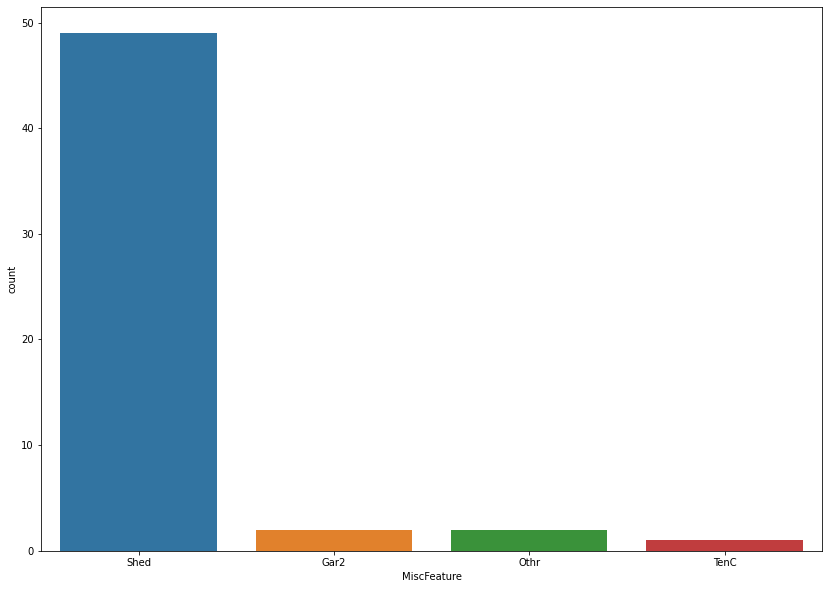

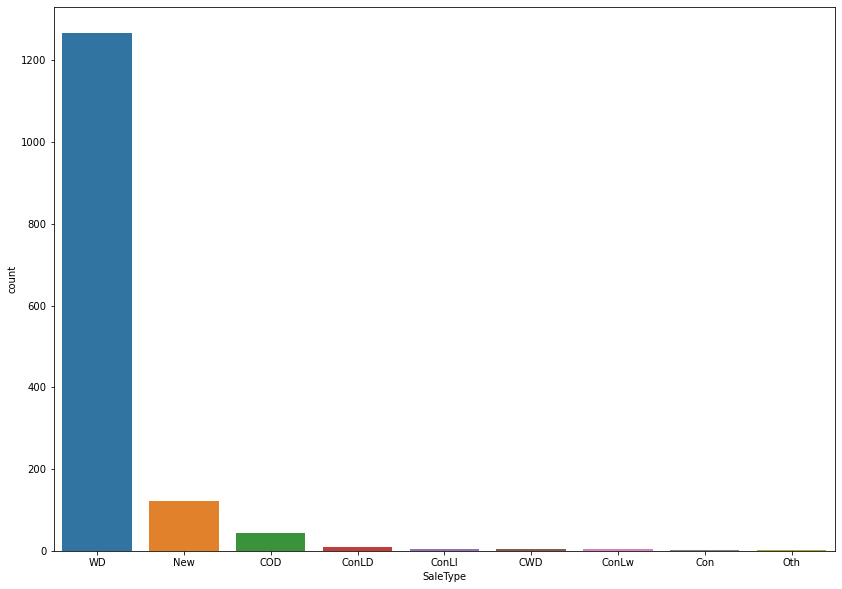

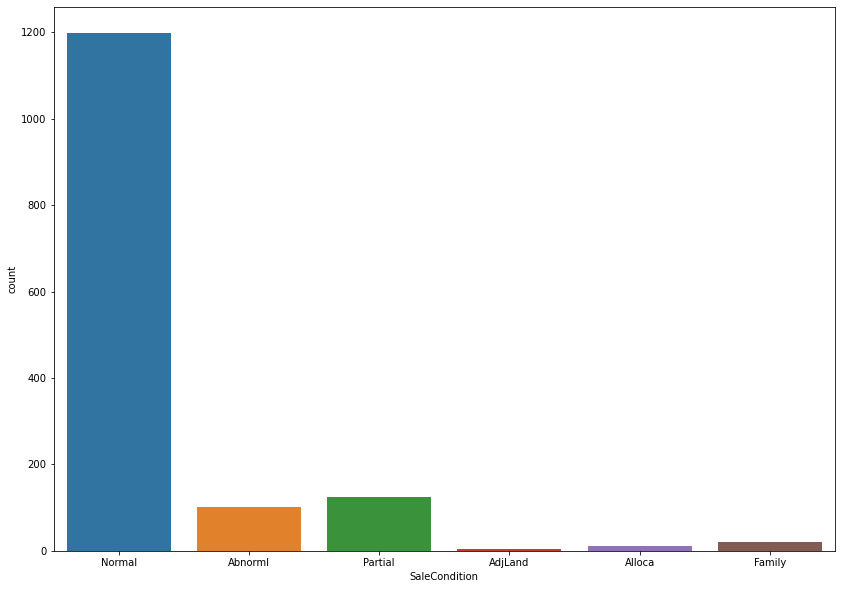

In [76]:

for item in categorical_cols.columns:
    plt.figure(figsize=(14,10))
    item = sns.countplot(x=item, data=categorical_cols)
    plt.show()
    plt.close()
    
#ax = sns.countplot(x=categorical_cols.columns, data=categorical_cols)

In [77]:
from sklearn.preprocessing import OneHotEncoder

In [132]:
enc = OneHotEncoder(handle_unknown='ignore')
X = [['Male', 1], ['Female', 3], ['Female', 2]]
enc.fit(X)

OneHotEncoder(handle_unknown='ignore')

In [133]:
type(enc)

sklearn.preprocessing._encoders.OneHotEncoder

In [134]:
enc.categories_

[array(['Female', 'Male'], dtype=object), array([1, 2, 3], dtype=object)]

In [135]:
enc.transform([['Female', 1], ['Male', 4]]).toarray()

array([[1., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [143]:
enc.inverse_transform([[0, 1, 1, 0, 0], [0, 0, 0, 1, 0]])


array([['Male', 1],
       [None, 2]], dtype=object)

In [144]:
enc.get_feature_names(['gender', 'group'])

array(['gender_Female', 'gender_Male', 'group_1', 'group_2', 'group_3'],
      dtype=object)

In [137]:
enc.transform(X)

<3x5 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [138]:
print(enc.transform(X))

  (0, 1)	1.0
  (0, 2)	1.0
  (1, 0)	1.0
  (1, 4)	1.0
  (2, 0)	1.0
  (2, 3)	1.0


In [145]:
enc = OneHotEncoder(handle_unknown='ignore')
X = categorical_cols
enc.fit(X)

OneHotEncoder(handle_unknown='ignore')

In [146]:
enc.categories_

[array(['C (all)', 'FV', 'RH', 'RL', 'RM'], dtype=object),
 array(['Grvl', 'Pave'], dtype=object),
 array(['Grvl', 'Pave', nan], dtype=object),
 array(['IR1', 'IR2', 'IR3', 'Reg'], dtype=object),
 array(['Bnk', 'HLS', 'Low', 'Lvl'], dtype=object),
 array(['AllPub', 'NoSeWa'], dtype=object),
 array(['Corner', 'CulDSac', 'FR2', 'FR3', 'Inside'], dtype=object),
 array(['Gtl', 'Mod', 'Sev'], dtype=object),
 array(['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr',
        'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel',
        'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown',
        'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber',
        'Veenker'], dtype=object),
 array(['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNe',
        'RRNn'], dtype=object),
 array(['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNn'],
       dtype=object),
 array(['1Fam', '2fmCon', 'Duplex', 'Twnhs', 'TwnhsE'], dtype=objec

In [158]:
enc.fit_transform(X)

<1460x268 sparse matrix of type '<class 'numpy.float64'>'
	with 62780 stored elements in Compressed Sparse Row format>

In [154]:
X.shape

(1460, 43)

In [156]:
X.head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1  ... GarageType GarageFinish GarageQual GarageCond  \
0      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
1      Veenker      Feedr  ...     Attchd          RFn         TA         TA   
2      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
3      Crawfor       Norm  ...     Detchd          Unf         TA         TA   
4      NoRidge       Norm  ...     Attchd          RFn         TA         TA   

  PavedDrive PoolQC Fence MiscFeature SaleType SaleCondition  
0          Y    NaN   NaN         NaN       WD        Normal  
1          Y    NaN   NaN         NaN       WD        Normal  
2          Y    NaN   NaN         NaN       WD        Normal  
3          Y    NaN   NaN         NaN       WD       Abnorml  
4          Y    NaN   NaN         NaN       WD        Normal  

[5 rows x 43 columns]

In [159]:
pd.get_dummies(X)

MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0                    0            0            0            1            0   
1                    0            0            0            1            0   
2                    0            0            0            1            0   
3                    0            0            0            1            0   
4                    0            0            0            1            0   
...                ...          ...          ...          ...          ...   
1455                 0            0            0            1            0   
1456                 0            0            0            1            0   
1457                 0            0            0            1            0   
1458                 0            0            0            1            0   
1459                 0            0            0            1            0   

      Street_Grvl  Street_Pave  Alley_Grvl  Alley_Pave  LotShape_IR1  ...  \
0               0            1           0           0             0  ...   
1               0            1           0           0             0  ...   
2               0            1           0           0             1  ...   
3               0            1           0           0             1  ...   
4               0            1           0           0             1  ...   
...           ...          ...         ...         ...           ...  ...   
1455            0            1           0           0             0  ...   
1456            0            1           0           0             0  ...   
1457            0            1           0           0             0  ...   
1458            0            1           0           0             0  ...   
1459            0            1           0           0             0  ...   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0                  0             0             0            1   
1                  0             0             0            1   
2                  0             0             0            1   
3                  0             0             0            1   
4                  0             0             0            1   
...              ...           ...           ...          ...   
1455               0             0             0            1   
1456               0             0             0            1   
1457               0             0             0            1   
1458               0             0             0            1   
1459               0             0             0            1   

      SaleCondition_Abnorml  SaleCondition_AdjLand  SaleCondition_Alloca  \
0                         0                      0                     0   
1                         0                      0                     0   
2                         0                      0                     0   
3                         1                      0                     0   
4                         0                      0                     0   
...                     ...                    ...                   ...   
1455                      0                      0                     0   
1456                      0                      0                     0   
1457                      0                      0                     0   
1458                      0                      0                     0   
1459                      0                      0                     0   

      SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
0                        0                     1                      0  
1                        0                     1                      0  
2                        0                     1                      0  
3                        0                     0                      0  
4                        0                     1                      0  
...   

In [160]:
X = X.join(pd.get_dummies(X))

In [161]:
X.shape

(1460, 295)